
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [3]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [5]:
#There are two useless variables in our dataset, those variables are: Address, Email and Avatar. They are useless cause I do not
#see how the email, the address or the choice of the Avatar of the customers could influence/predict the choice to purchase via
#website or via app.

customers.drop(["Address","Avatar","Email"], axis=1, inplace=True)
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#### Check Missing values

In [6]:
customers.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Check disttribution of the target variable

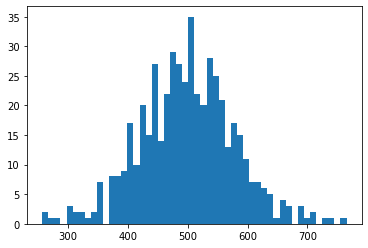

In [7]:
#Visualizing the distribution with an histogram
import matplotlib.pyplot as plt

plt.hist(customers["Yearly Amount Spent"], bins=50)

plt.show()

stat=0.996, p=0.264

The target variable probably follows a normal distribution


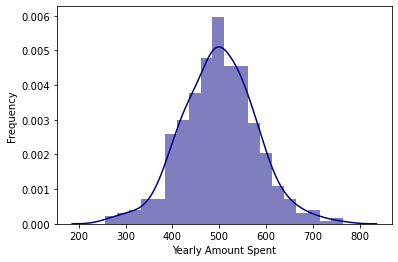

In [8]:
#Checking for normality
import seaborn as sns
ax = sns.distplot(customers["Yearly Amount Spent"],
                  bins=20,
                  kde=True,
                  color='navy',
                  hist_kws={"linewidth": 15,'alpha':0.5})
ax.set(xlabel='Yearly Amount Spent', ylabel='Frequency')

from scipy.stats import shapiro
stat, p= shapiro(customers["Yearly Amount Spent"])
print("stat=%.3f, p=%.3f\n" % (stat, p))
if p>0.05:
    print("The target variable probably follows a normal distribution")
else:
    print("The target variable probably does not follow a normal distribution")

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

In [9]:
#Correlation matrix
pd.set_option('display.width', 1000)

corrMatrix = customers.corr()
print (corrMatrix)

                      Avg. Session Length  Time on App  Time on Website  Length of Membership  Yearly Amount Spent
Avg. Session Length              1.000000    -0.027826        -0.034987              0.060247             0.355088
Time on App                     -0.027826     1.000000         0.082388              0.029143             0.499328
Time on Website                 -0.034987     0.082388         1.000000             -0.047582            -0.002641
Length of Membership             0.060247     0.029143        -0.047582              1.000000             0.809084
Yearly Amount Spent              0.355088     0.499328        -0.002641              0.809084             1.000000


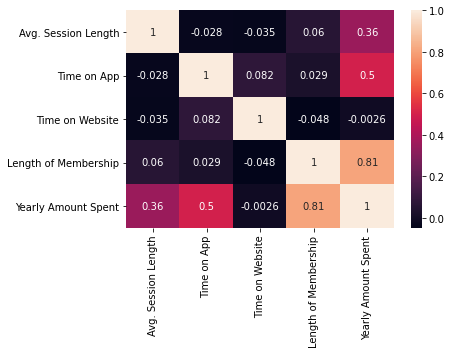

In [10]:
#Heatmap of the correlation matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()

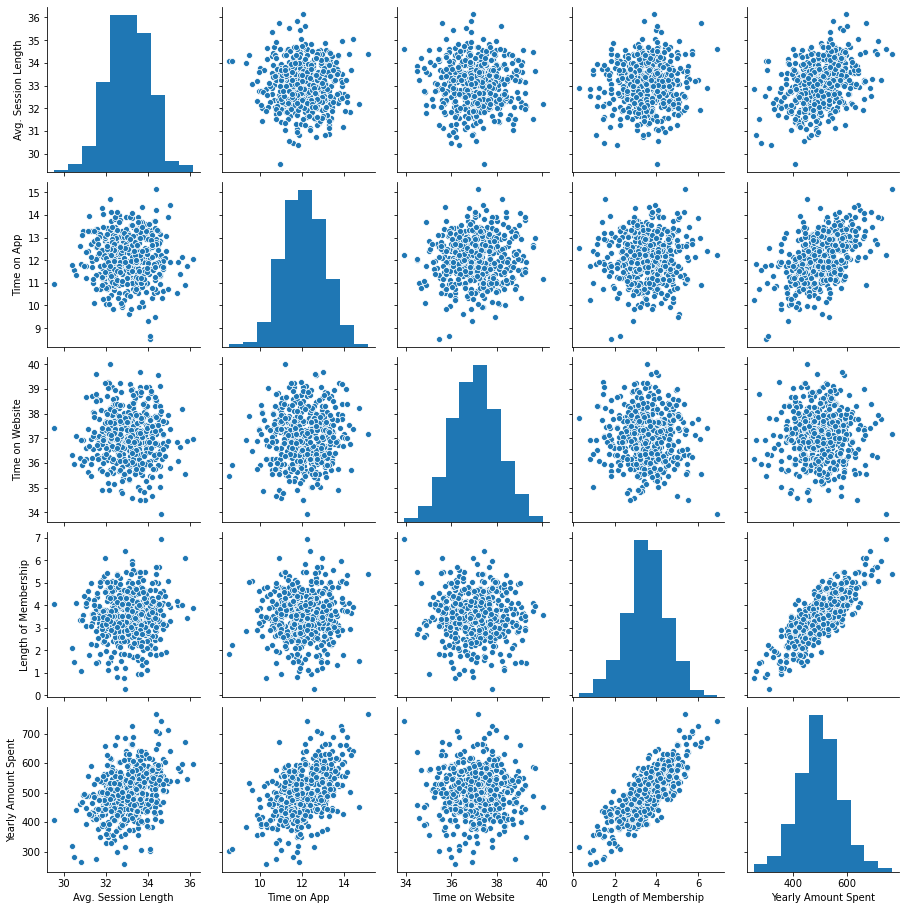

In [11]:
#Pairplot to check visually the existence of multicollinearity
sns.pairplot(customers)
plt.show()

In [12]:
#Comments on the multicollinearity
print("""Our model does not present any remarkable multicollinearity because the only correlation coefficients
above 0.5 are among our target variable and some of the predictors. The only feature that is almost totally uncorrelated
with our target variable is TIME ON WEBSITE and this value is insightfull for our purposes.""")

Our model does not present any remarkable multicollinearity because the only correlation coefficients
above 0.5 are among our target variable and some of the predictors. The only feature that is almost totally uncorrelated
with our target variable is TIME ON WEBSITE and this value is insightfull for our purposes.


## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [13]:
# Prepare data for training
y = customers['Yearly Amount Spent'].values
X = customers["Length of Membership"].values

print(y.shape)
print(X.shape)

y = y.reshape(-1,1)
X = X.reshape(-1,1)

print(y.shape)
print(X.shape)

(500,)
(500,)
(500, 1)
(500, 1)


In [14]:
#Simple Linear Regression

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X, y)
intercept = lin_model.intercept_
coeff = lin_model.coef_
print(intercept, coeff)

[272.39978606] [[64.21868432]]


In [15]:
#Explanation of the choice of the feature
print("""I decided to use LENGTH OF THE MEMBERSHIP because of its highest correlation with our target variable.
The result of the simple linear regression model is in line with my expectations and the value of the coefficient of
my predictor is 64.22 so our model says that an additional year of memebership create an increase of the yearly amount spent
equal to 64 euros and 22 cents.""")

I decided to use LENGTH OF THE MEMBERSHIP because of its highest correlation with our target variable.
The result of the simple linear regression model is in line with my expectations and the value of the coefficient of
my predictor is 64.22 so our model says that an additional year of memebership create an increase of the yearly amount spent
equal to 64 euros and 22 cents.


### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [16]:
# Splitting Data Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375, 1) (125, 1) (375, 1) (125, 1)


### Training of the model

In [17]:
lin_model.fit(X_train, y_train)

LinearRegression()

#### Print the coeficients of the model

In [18]:
intercept = lin_model.intercept_
coeff = lin_model.coef_
print(intercept, coeff)

[269.65403592] [[65.14793731]]


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

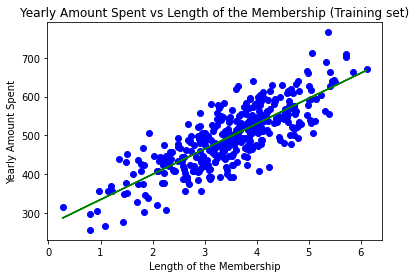

The coefficient I found definitely makes sense also according to the plot, cause there is a positive relationship
among the two variables as we can see from the positive slope of the line and quantitavely the number 65(the coefficient
of my X) also makes sense, in fact we can notice also from the plot that a unit increase of X roughly produces an increase
of 65 in y.


In [19]:
plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_train, lin_model.predict(X_train), color = "green")
plt.title("Yearly Amount Spent vs Length of the Membership (Training set)")
plt.xlabel("Length of the Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

print("""The coefficient I found definitely makes sense also according to the plot, cause there is a positive relationship
among the two variables as we can see from the positive slope of the line and quantitavely the number 65(the coefficient
of my X) also makes sense, in fact we can notice also from the plot that a unit increase of X roughly produces an increase
of 65 in y.""")

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

MAE = 34.03233090526607 ; MSE = 1744.646561976358 ; RMSE = 41.768966493993574 ; R2 = 0.6889559142164579
The value of the R2 squared is pretty high, so we can state that our predictor explains a big part of the variance
of our target variable.


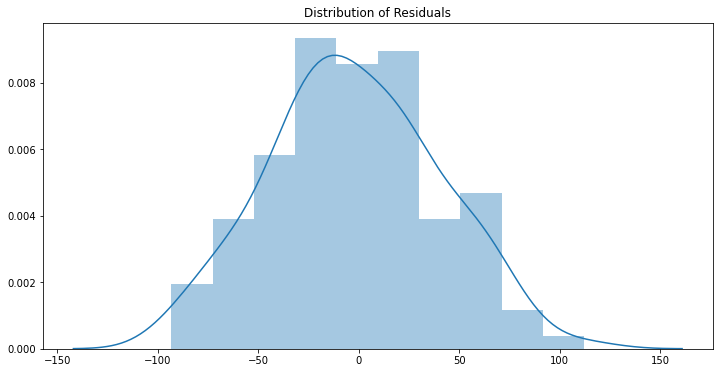

stat=0.992, p=0.714

The residuals are normally distributed so the OLS assumption about the normality of the residuals holds and so statistic significance of our coefficient is not biased


In [20]:
#Calculating the predicted valued and the residuals of the model
y_pred = lin_model.predict(X_test)
residuals = y_test - y_pred

#Some metrics to evaluate the model
from sklearn import metrics
import numpy as np

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = metrics.r2_score(y_test, y_pred)

print("MAE =", MAE, "; MSE =", MSE, "; RMSE =", RMSE, "; R2 =", R2)
print("""The value of the R2 squared is pretty high, so we can state that our predictor explains a big part of the variance
of our target variable.""")

#Checking for the normality of the residuals
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

stat, p= shapiro(residuals)
print("stat=%.3f, p=%.3f\n" % (stat, p))
if p>0.05:
    print("The residuals are normally distributed so the OLS assumption about the normality of the residuals holds and so statistic significance of our coefficient is not biased")
else:
    print("The residuals are not normally distributed")

## Multivariate Model

In [21]:
# Prepare data for training
y = customers['Yearly Amount Spent'].values
X = customers.drop('Yearly Amount Spent', axis=1).values

print(y.shape)

y = y.reshape(-1,1)

print(y.shape)
print(X.shape)

(500,)
(500, 1)
(500, 4)


### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [22]:
# Splitting Data Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375, 4) (125, 4) (375, 1) (125, 1)


### Training of the model

In [23]:
lin_model.fit(X_train, y_train)

LinearRegression()

#### Print the coeficients of the model

In [24]:
intercept = lin_model.intercept_
coeff = lin_model.coef_
print(intercept, coeff)

[-1058.34843704] [[25.93433553 38.48586385  0.497176   61.78844721]]


In [25]:
#Writing down the results of our model

print("""According to our results this is the model with its coefficients:
Yearly Amount Spent = -1058.35 + 25.93(Avg. Session Length) + 38.49(Time on App) + 0.5(Time on Website) + 61.79(Length of Membership)""")

According to our results this is the model with its coefficients:
Yearly Amount Spent = -1058.35 + 25.93(Avg. Session Length) + 38.49(Time on App) + 0.5(Time on Website) + 61.79(Length of Membership)


In [28]:
#Checking the signifance of our coefficients

import statsmodels.api as sm

X_train = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5880.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:29:54   Log-Likelihood:                -1396.7
No. Observations:                 375   AIC:                             2803.
Df Residuals:                     370   BIC:                             2823.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1058.3484     27.531    -38.442      0.0

### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

#### Evalution Metrics

MAE = 7.420869348688968 ; MSE = 92.75754400896422 ; RMSE = 9.631071799595526 ; R2 = 0.983462733309656
The value of the R2 squared is almost equal to 1, so we can state that our predictors explains almost the totality of
the variance of our target variable.


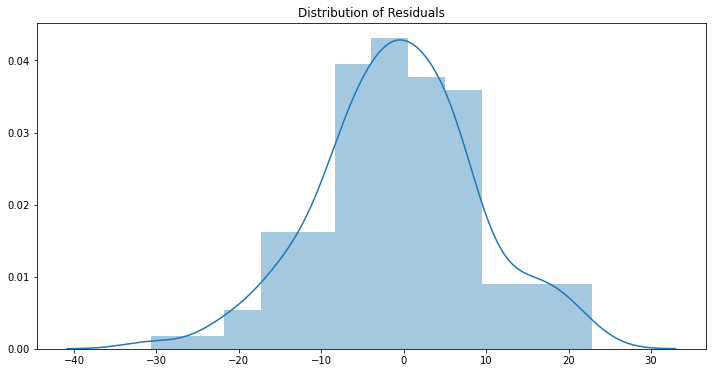

stat=0.991, p=0.565

The residuals are normally distributed so the OLS assumption about the normality of the residuals holds and so statistic significance of our coefficient is not biased


In [30]:
#Calculating the predicted valued and the residuals of the model
y_pred = lin_model.predict(X_test)
residuals = y_test - y_pred

#Some metrics to evaluate the model
from sklearn import metrics
import numpy as np

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = metrics.r2_score(y_test, y_pred)

print("MAE =", MAE, "; MSE =", MSE, "; RMSE =", RMSE, "; R2 =", R2)
print("""The value of the R2 squared is almost equal to 1, so we can state that our predictors explains almost the totality of
the variance of our target variable.""")

#Checking for the normality of the residuals
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

stat, p= shapiro(residuals)
print("stat=%.3f, p=%.3f\n" % (stat, p))
if p>0.05:
    print("The residuals are normally distributed so the OLS assumption about the normality of the residuals holds and so statistic significance of our coefficient is not biased")
else:
    print("The residuals are not normally distributed")

#### Which model has better performance?

Write your answer here:






**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Write your answer here:








In [33]:
print("""Looking at the coefficients of my multivariate model and their levels of significance, I can state that the
coefficient of the TIME ON WEBSITE is not signficant, so it seems that the time spent on the website of the
customers does not have an effect on the Yearly Amount Spent. Considering this result the company should focus their efforts
on their mobile app experience(in fact the coefficient of the TIME ON APP is positive and significant) and not on their
website. The model with the best performance is by far the multivariate one, as we can see from the value of R2, this
model is able to explain a bigger part of the variance of our dependent variable. Moreover, the multivariate regression
better fits our purposes, in fact the aim of this work was trying to isolate the effect of the time spent on the website over
the "Yearly Amount Spent" and the effect of the time spent on the app to verify which was more relevant.""")

Looking at the coefficients of my multivariate model and their levels of significance, I can state that the
coefficient of the TIME ON WEBSITE is not signficant, so it seems that the time spent on the website of the
customers does not have an effect on the Yearly Amount Spent. Considering this result the company should focus their efforts
on their mobile app experience(in fact the coefficient of the TIME ON APP is positive and significant) and not on their
website. The model with the best performance is by far the multivariate one, as we can see from the value of R2, this
model is able to explain a bigger part of the variance of our dependent variable. Moreover, the multivariate regression
better fits our purposes, in fact the aim of this work was trying to isolate the effect of the time spent on the website over
the "Yearly Amount Spent" and the effect of the time spent on the app to verify which was more relevant.
